# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
from mlxtend.plotting import plot_confusion_matrix

warnings.filterwarnings('ignore')

# Set visualization styles
sns.set(style="whitegrid")

# Read and display a snapshot ofour dataset

In [2]:
# Load the dataset
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Display the first few rows of the dataset
df.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


# Lets check for missing values and data types

In [3]:
df.info()
df.describe()
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

Mental_Health_Condition    1196
Physical_Activity          1629
dtype: int64

# Further data cleaning

In [4]:
df.drop_duplicates(inplace=True)


In [5]:
df["Physical_Activity"] = df["Physical_Activity"].fillna("None")
df["Mental_Health_Condition"] = df["Mental_Health_Condition"].fillna("None")
df.sample(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
3682,EMP3683,53,Female,Data Scientist,Consulting,29,Remote,59,5,3,High,Burnout,Yes,Decrease,1,Unsatisfied,4,Daily,Poor,Africa
124,EMP0125,42,Non-binary,HR,Manufacturing,27,Remote,26,14,2,High,Depression,Yes,No Change,1,Unsatisfied,4,Daily,Average,South America
1953,EMP1954,60,Prefer not to say,Data Scientist,Education,19,Hybrid,57,3,5,High,None,No,Increase,2,Unsatisfied,4,None,Good,Oceania
1112,EMP1113,32,Non-binary,Data Scientist,IT,13,Remote,42,5,1,Medium,Depression,No,Decrease,4,Unsatisfied,4,Weekly,Poor,Oceania
2875,EMP2876,39,Female,Data Scientist,Education,18,Onsite,38,15,2,High,None,No,Increase,5,Satisfied,4,None,Average,Asia
3719,EMP3720,39,Male,Data Scientist,Finance,34,Remote,39,0,5,High,Anxiety,No,No Change,1,Unsatisfied,2,Daily,Good,Asia
3085,EMP3086,59,Prefer not to say,Data Scientist,Finance,30,Hybrid,49,0,2,High,None,No,Increase,2,Unsatisfied,2,None,Poor,North America
597,EMP0598,58,Female,HR,Finance,19,Remote,45,12,4,High,Depression,No,Increase,5,Unsatisfied,4,Daily,Poor,South America
3994,EMP3995,25,Male,Sales,IT,27,Remote,41,8,1,High,Anxiety,Yes,Decrease,5,Unsatisfied,3,None,Poor,Asia
91,EMP0092,22,Female,Software Engineer,Manufacturing,9,Onsite,60,3,1,High,Burnout,No,Decrease,3,Satisfied,5,Weekly,Good,South America


# Some data visualizations

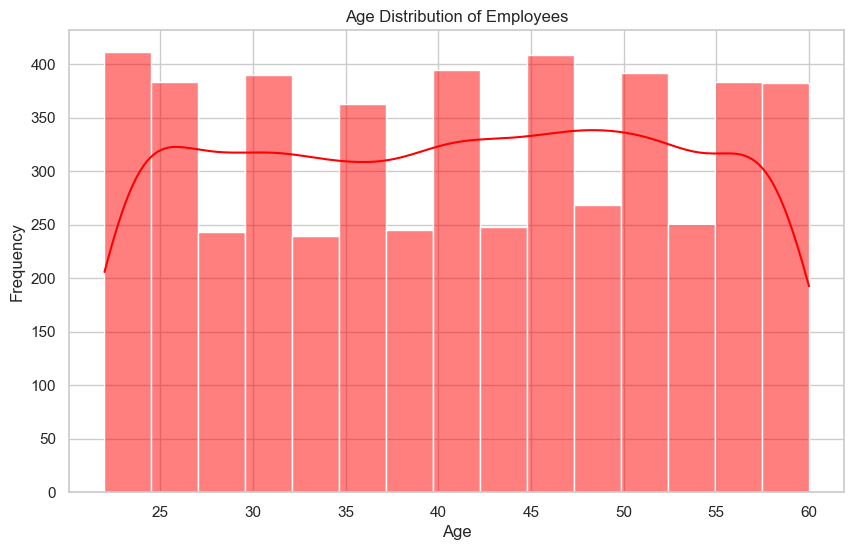

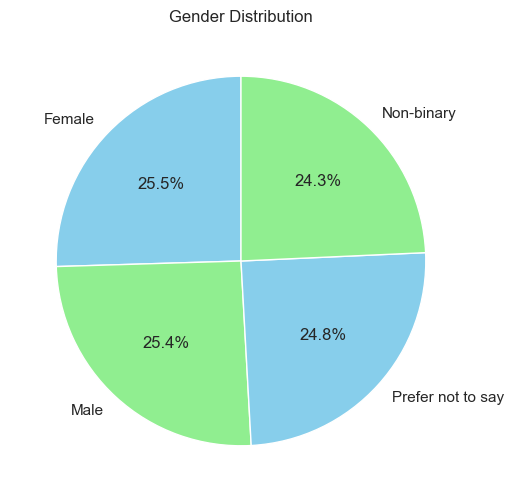

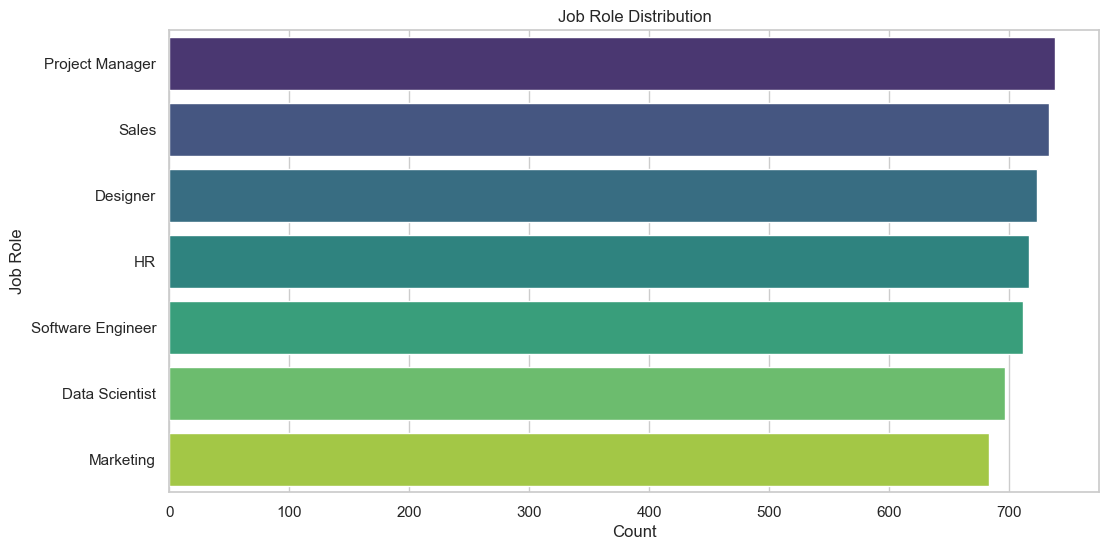

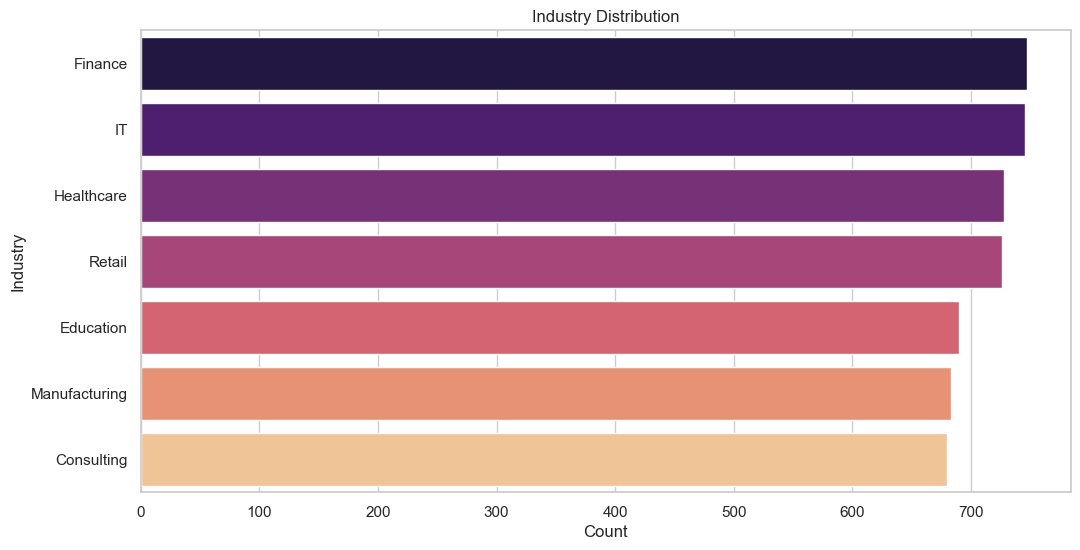

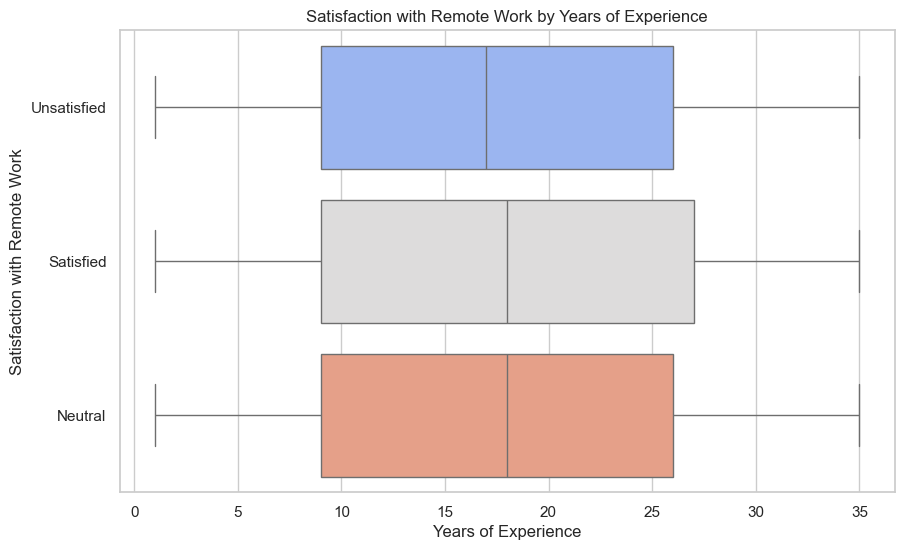

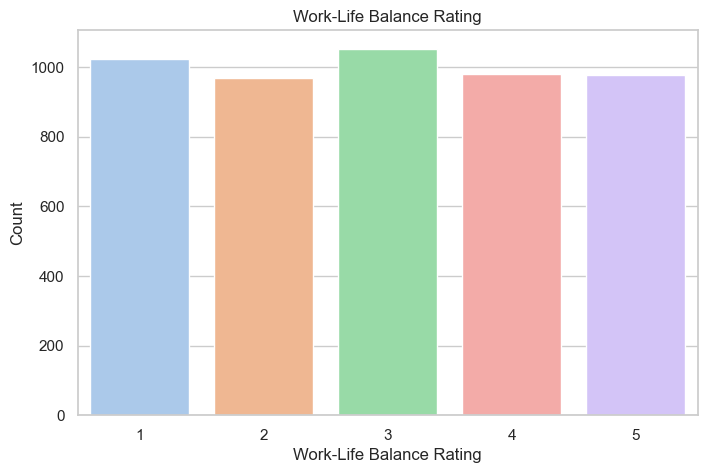

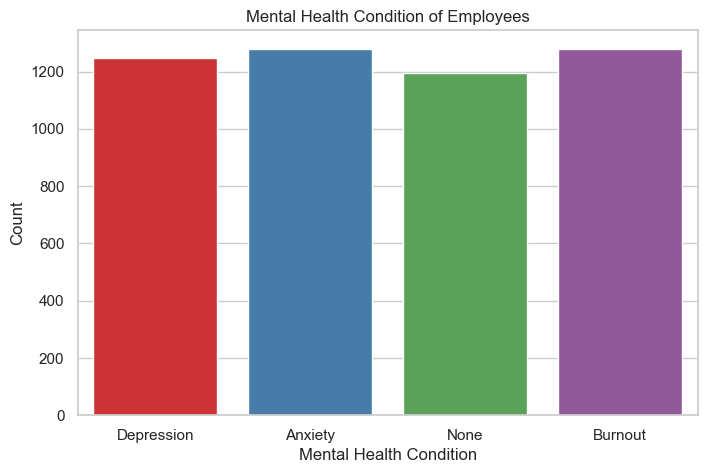

In [6]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='red')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()

# Job role distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Job_Role', order=df['Job_Role'].value_counts().index, palette='viridis')
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

# Industry distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='magma')
plt.title('Industry Distribution')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

# Boxplot for Years of Experience vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Years_of_Experience', y='Satisfaction_with_Remote_Work', palette='coolwarm')
plt.title('Satisfaction with Remote Work by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Satisfaction with Remote Work')
plt.show()

# Countplot for Work-Life Balance Rating
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Work_Life_Balance_Rating', palette='pastel')
plt.title('Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

# Countplot for Mental Health Condition
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Mental_Health_Condition', palette='Set1')
plt.title('Mental Health Condition of Employees')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

### Data seems to be relatively uniform and evenly distributed along the major x vars and y we anticipate on predicting. Let's move forwards with creating some training and testing splits to build our predictive model.

# Convert categorical vars and split data

In [7]:
df.columns

for item in df.columns:
    print(item, df[item].dtype)
    
df.sample(5)

Employee_ID object
Age int64
Gender object
Job_Role object
Industry object
Years_of_Experience int64
Work_Location object
Hours_Worked_Per_Week int64
Number_of_Virtual_Meetings int64
Work_Life_Balance_Rating int64
Stress_Level object
Mental_Health_Condition object
Access_to_Mental_Health_Resources object
Productivity_Change object
Social_Isolation_Rating int64
Satisfaction_with_Remote_Work object
Company_Support_for_Remote_Work int64
Physical_Activity object
Sleep_Quality object
Region object


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4759,EMP4760,27,Male,HR,Manufacturing,30,Onsite,58,5,2,High,Anxiety,Yes,No Change,1,Satisfied,2,None,Average,North America
1199,EMP1200,35,Non-binary,Data Scientist,Education,14,Onsite,52,11,4,Medium,Depression,No,Increase,2,Neutral,2,None,Average,South America
410,EMP0411,22,Prefer not to say,Software Engineer,Healthcare,6,Remote,43,3,2,Medium,None,No,No Change,4,Unsatisfied,4,Daily,Good,Europe
2812,EMP2813,33,Female,Designer,Retail,33,Remote,46,0,2,High,Depression,Yes,No Change,2,Neutral,1,None,Average,North America
4848,EMP4849,50,Prefer not to say,HR,Finance,8,Onsite,56,8,4,High,Anxiety,No,Decrease,1,Unsatisfied,5,None,Average,Africa


In [8]:

df['Has_Mental_Health_Condition'] = (df['Mental_Health_Condition'] != "None").astype(int)

df[['Has_Mental_Health_Condition', 'Mental_Health_Condition']].sample(10)

df = df.drop('Mental_Health_Condition', axis=1)

df.sample(5)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Has_Mental_Health_Condition
2108,EMP2109,38,Male,Sales,Finance,26,Hybrid,25,2,4,High,No,Increase,3,Neutral,5,Weekly,Good,South America,1
4724,EMP4725,60,Prefer not to say,Marketing,Consulting,22,Hybrid,31,14,2,High,No,Increase,4,Unsatisfied,5,None,Poor,South America,1
279,EMP0280,37,Prefer not to say,Software Engineer,Healthcare,25,Hybrid,33,11,1,Medium,No,No Change,4,Satisfied,5,None,Good,North America,1
2130,EMP2131,59,Prefer not to say,Data Scientist,IT,18,Hybrid,37,2,3,Low,Yes,Increase,2,Neutral,3,Daily,Average,Europe,1
2331,EMP2332,23,Male,HR,Finance,9,Remote,20,4,3,Medium,No,Decrease,1,Unsatisfied,2,Daily,Poor,Oceania,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode the target variable
label_encoder = LabelEncoder()
# df['Has_Mental_Health_Condition'] = label_encoder.fit_transform(df['Has_Mental_Health_Condition'])

# Drop unnecessary columns
if ('Employee_ID' in df.columns):
    df = df.drop(['Employee_ID'], axis=1)
    
for column in df.columns:
    if (df[column].dtype != 'int64'):
        df[column] = label_encoder.fit_transform(df[column])

# One-hot encode selected categorical features
categorical_features = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Region']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df_encoded = df_encoded[['Hours_Worked_Per_Week', 'Stress_Level', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Has_Mental_Health_Condition']]

# Define features and target
X = df_encoded.drop('Has_Mental_Health_Condition', axis=1)
# X = df_encoded.drop('Mental_Health_Condition', axis=1)
y = df_encoded['Has_Mental_Health_Condition']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape of the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

df.columns

Training set shape: (4000, 4)
Validation set shape: (1000, 4)


Index(['Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience',
       'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Work_Life_Balance_Rating', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region', 'Has_Mental_Health_Condition'],
      dtype='object')

In [10]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [11]:
y_pred = log_reg.predict(X_val)
y_pred_prob = log_reg.predict_proba(X_val)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(y_val, y_pred, average = 'weighted')
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average = 'weighted')
recall = recall_score(y_val, y_pred, average = 'weighted')
y_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ":" + str(round(y_scores[i], 5)))

f1:0.66043
acc:0.763
prec:0.58217
recall:0.763


In [12]:
matrix = classification_report(y_val, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.76      1.00      0.87       763

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.58      0.76      0.66      1000



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

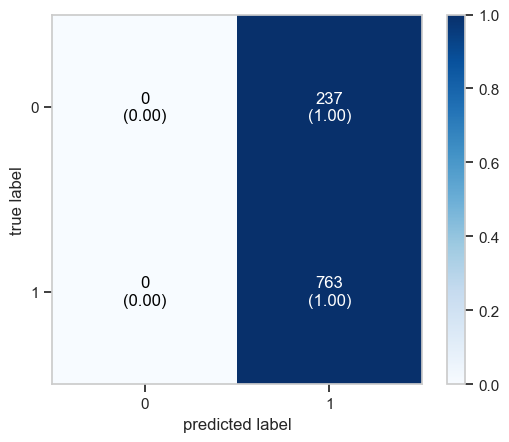

In [13]:
confusion_matrix = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(conf_mat = confusion_matrix, show_absolute=True, show_normed=True, colorbar=True)

In [14]:
classification_report(y_val, y_pred)
accuracy_score(y_val, y_pred)

0.763